<a href="https://colab.research.google.com/github/imanhamid/selectionscan_NN/blob/master/segmentation_multivariant_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 4.6MB/s 
     |████████████████████████████████| 1.0MB 12.8MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 358kB 26.3MB/s 
     |████████████████████████████████| 40kB 7.0MB/s 
     |████████████████████████████████| 40kB 7.2MB/s 
     |████████████████████████████████| 92kB 9.8MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 2.6MB 27.2MB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastbook import *

In [4]:
from fastai.vision.all import *

In [6]:
import fastai; fastai.__version__

'2.0.13'

In [8]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [45]:
path = Path(base_dir + 'data/segmentation/multivariant/')

In [46]:
path_lbl = path/'labels'
path_img = path/'images'
fnames = get_image_files(path_img)
lbl_names = get_image_files(path_lbl)

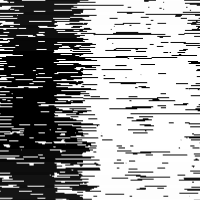

In [47]:
img_f = fnames[100]
img = Image.open(img_f)
img

In [48]:
def get_y_fn(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

print(get_y_fn(img_f))

/content/gdrive/My Drive/fastai-v3/data/segmentation/multivariant/labels/multivariant_seed-893_ancestry_P.png


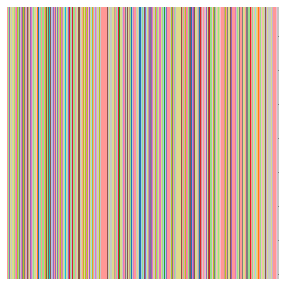

In [49]:
mask = OpenMask(get_y_fn(img_f))
mask.show(alpha=1)

In [50]:
torch.set_printoptions(profile="full")
print(mask.getcolors())

[(1800, 0), (400, 1), (5600, 2), (10800, 3), (2600, 4), (800, 5), (3800, 6), (11200, 7), (3000, 8)]


In [51]:
codes = np.array(['neutral', '0 < s <= 0.001', '0.001 < s <= 0.01', '0.01 < s <= 0.05', 's > 0.05', '-0.001 <= s < 0', '-0.01 <= s < -0.001', \
               '-0.05 <= s < -0.01', 's < -0.05'], dtype=str)

In [52]:
dbs = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items = get_image_files,
                   get_y = get_y_fn,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42))

In [53]:
dls = dbs.dataloaders(path_img, path=path, bs=8)

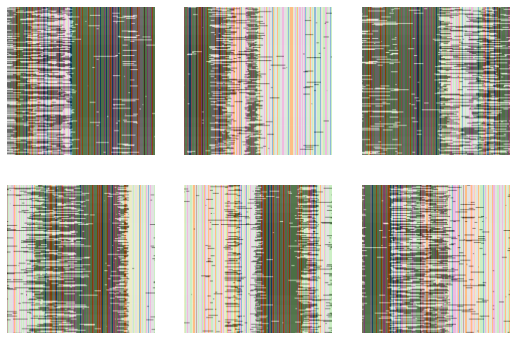

In [54]:
dls.show_batch(max_n=6)

In [57]:
learn = unet_learner(dls, resnet18)

In [58]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,time
0,1.826482,1.799006,01:03
1,1.784671,1.783942,00:32
2,1.769404,1.768699,00:32
3,1.761647,1.761839,00:32
4,1.755814,1.760820,00:32
5,1.748173,1.762732,00:32
6,1.733585,1.766958,00:32
7,1.720009,1.771458,00:32


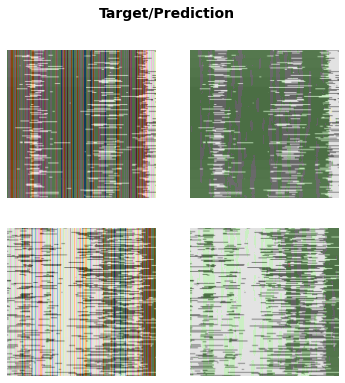

In [60]:
learn.show_results(max_n=6)

AttributeError: ignored

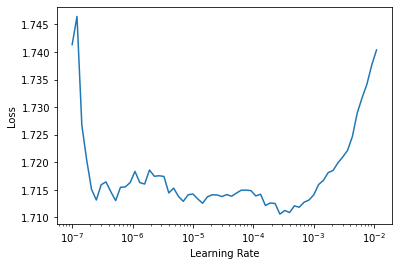

In [61]:
learn.lr_find()
learn.recorder.plot()

In [62]:
learn.fit_one_cycle(10, wd=1e-2, lr = slice(3e-5))

epoch,train_loss,valid_loss,time
0,1.721301,1.771655,00:32
1,1.735289,1.772938,00:32
2,1.739414,1.769333,00:32
3,1.729956,1.777273,00:32
4,1.714201,1.780398,00:32
5,1.691658,1.804537,00:32
6,1.658523,1.812913,00:32
7,1.616145,1.852878,00:32
8,1.580187,1.875193,00:32
9,1.561059,1.884215,00:32


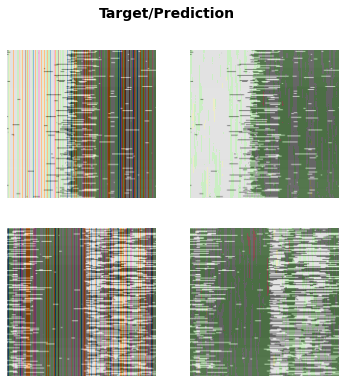

In [66]:
learn.show_results(max_n=6)

In [67]:
learn.fit_one_cycle(50, wd=1e-2, lr = slice(3e-5))

epoch,train_loss,valid_loss,time
0,1.554234,1.890726,00:32
1,1.551488,1.895983,00:32
2,1.546520,1.928060,00:32
3,1.542741,1.928922,00:32
4,1.532332,1.939284,00:32
5,1.526753,1.957020,00:32
6,1.526134,1.975757,00:32
7,1.522110,1.966807,00:32
8,1.520888,1.952328,00:32
9,1.515968,1.990249,00:32


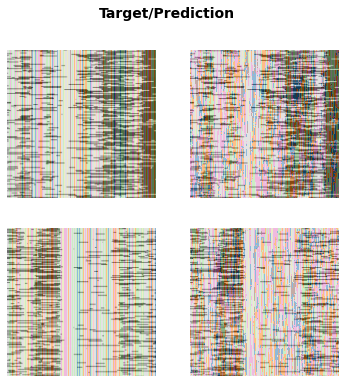

In [68]:
learn.show_results(max_n=6)